In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
from matplotlib import cm

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from haversine import haversine
from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

In [2]:
mc = pd.read_csv("Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv")
mc

,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,Accidents (Unintentional Injuries),Motor Vehicle Accidents,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,3466,4600,2815,58229,12074,11461,2572,3320,1213,4026
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,3797,4979,3005,63190,13576,12311,2754,3618,1437,4354
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,3705,4645,2755,58049,12968,12559,2734,3720,1499,4631
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,4083,4818,2769,61650,13595,14520,3034,3709,1726,6233
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,4603,5346,3138,67024,14653,14748,3010,3966,1674,5659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,United States,2015,12,233735,215657,3517,50462,6860,10112,4449,...,3353,4365,3211,55220,12260,12389,3245,3469,1568,4246
68,United States,2016,12,249207,228888,3714,51428,7446,11277,4981,...,3620,4472,3465,58572,13320,14363,3330,3397,1609,5829
69,United States,2017,12,258657,237819,3859,52001,7983,11751,6058,...,3816,4730,3317,60902,13740,14728,3391,3629,1580,5799
70,United States,2018,12,249280,229184,3620,51622,7663,10950,4489,...,3899,4647,3104,58613,13111,13851,3181,3713,1556,5551


In [3]:
mc.columns

Index(['Jurisdiction of Occurrence', 'Year', 'Month', 'All Cause',
       'Natural Cause', 'Septicemia', 'Malignant Neoplasms',
       'Diabetes Mellitus', 'Alzheimer Disease', 'Influenza and Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System',
       'Nephritis, Nephrotic Syndrome, and Nephrosis',
       'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',
       'Diseases of Heart', 'Cerebrovascular Diseases',
       'Accidents (Unintentional Injuries)', 'Motor Vehicle Accidents',
       'Intentional Self-Harm (Suicide)', 'Assault (Homicide)',
       'Drug Overdose'],
      dtype='object')

In [4]:
print(mc.head())
print(mc.info())
print(mc.describe())

  Jurisdiction of Occurrence  Year  Month  All Cause  Natural Cause  \
0              United States  2014      1     243298         226621   
1              United States  2015      1     265355         247269   
2              United States  2016      1     245823         227341   
3              United States  2017      1     262832         241918   
4              United States  2018      1     286744         265418   

   Septicemia  Malignant Neoplasms  Diabetes Mellitus  Alzheimer Disease  \
0        3944                51101               7344               8305   
1        4194                52346               8053              11638   
2        3846                51863               7392              10612   
3        4089                52120               7907              12018   
4        4502                52876               8674              13410   

   Influenza and Pneumonia  ...  Other Diseases of Respiratory System  \
0                     7929  ...            

In [5]:
print(mc.isnull().sum())

Jurisdiction of Occurrence                                                                  0
Year                                                                                        0
Month                                                                                       0
All Cause                                                                                   0
Natural Cause                                                                               0
Septicemia                                                                                  0
Malignant Neoplasms                                                                         0
Diabetes Mellitus                                                                           0
Alzheimer Disease                                                                           0
Influenza and Pneumonia                                                                     0
Chronic Lower Respiratory Diseases                          

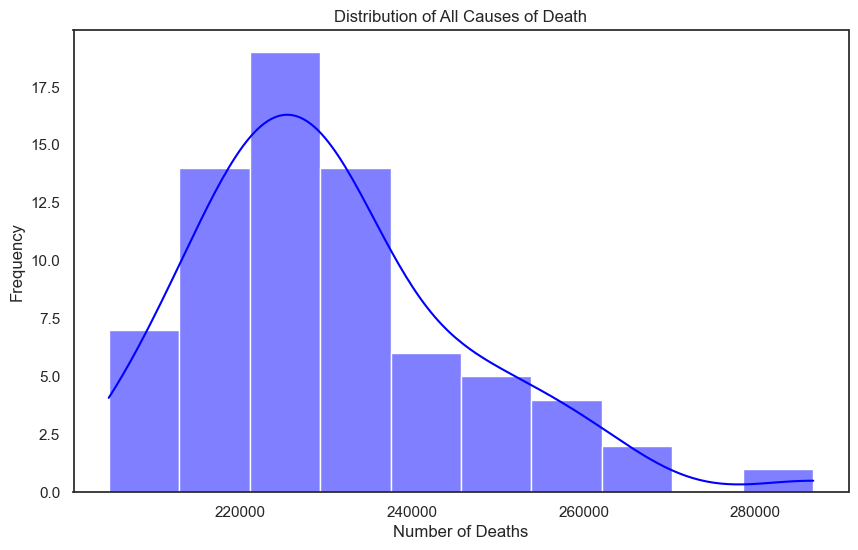

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(mc['All Cause'], kde=True, color='blue')
plt.title('Distribution of All Causes of Death')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()


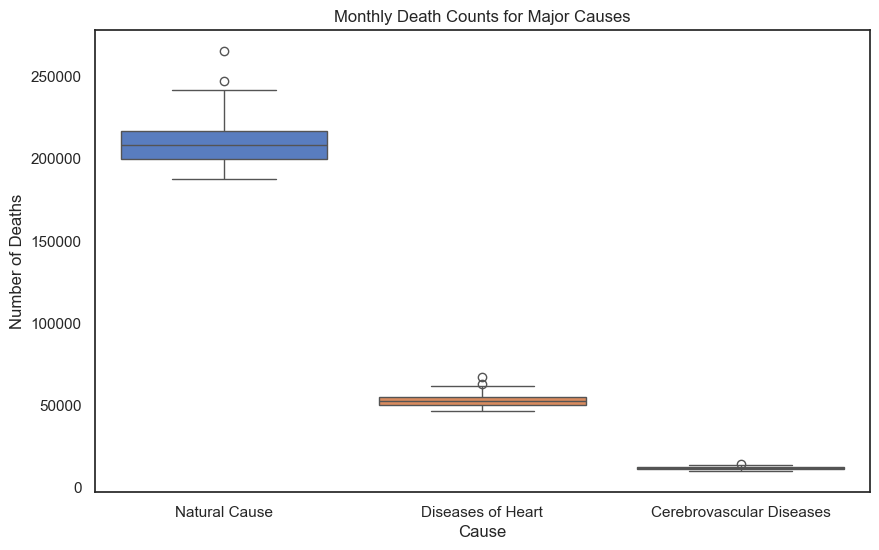

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mc[['Natural Cause', 'Diseases of Heart', 'Cerebrovascular Diseases']])
plt.title('Monthly Death Counts for Major Causes')
plt.xlabel('Cause')
plt.ylabel('Number of Deaths')
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_8324\3905920496.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=total_counts, x='Total Count', y='Disease', palette='Blues')


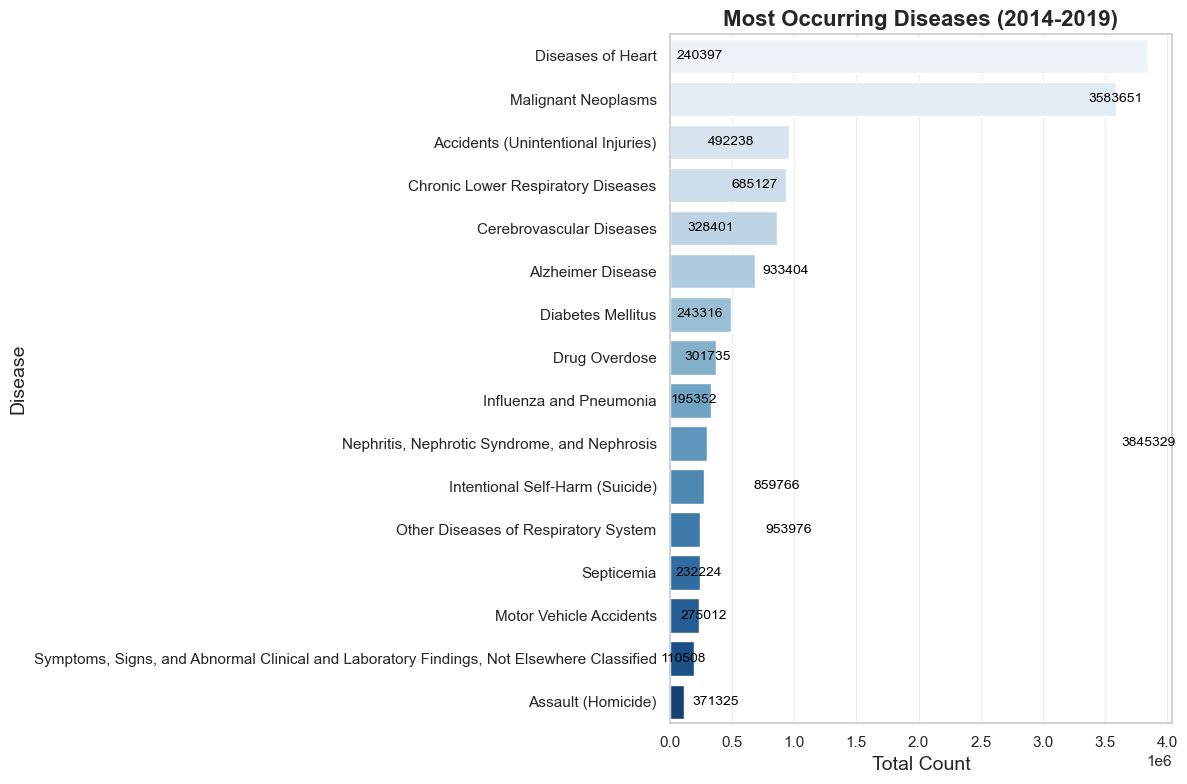

In [25]:
# Load your dataset
data = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')

disease_columns = [
    'Septicemia', 
    'Malignant Neoplasms', 
    'Diabetes Mellitus', 
    'Alzheimer Disease', 
    'Influenza and Pneumonia', 
    'Chronic Lower Respiratory Diseases', 
    'Other Diseases of Respiratory System', 
    'Nephritis, Nephrotic Syndrome, and Nephrosis', 
    'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified', 
    'Diseases of Heart', 
    'Cerebrovascular Diseases', 
    'Accidents (Unintentional Injuries)', 
    'Motor Vehicle Accidents', 
    'Intentional Self-Harm (Suicide)', 
    'Assault (Homicide)', 
    'Drug Overdose'
]

# Calculate the total counts for each disease
total_counts = data[disease_columns].sum().reset_index()
total_counts.columns = ['Disease', 'Total Count']
total_counts = total_counts.sort_values(by='Total Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')  # Set theme for better aesthetics
bar_plot = sns.barplot(data=total_counts, x='Total Count', y='Disease', palette='Blues')

for index, row in total_counts.iterrows():
    bar_plot.text(row['Total Count'] + 5, index, f"{row['Total Count']}", color='black', ha='center', va='center', fontsize=10)

# Step 5: Enhance the plot with titles and labels
plt.title('Most Occurring Diseases (2014-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Total Count', fontsize=14)
plt.ylabel('Disease', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


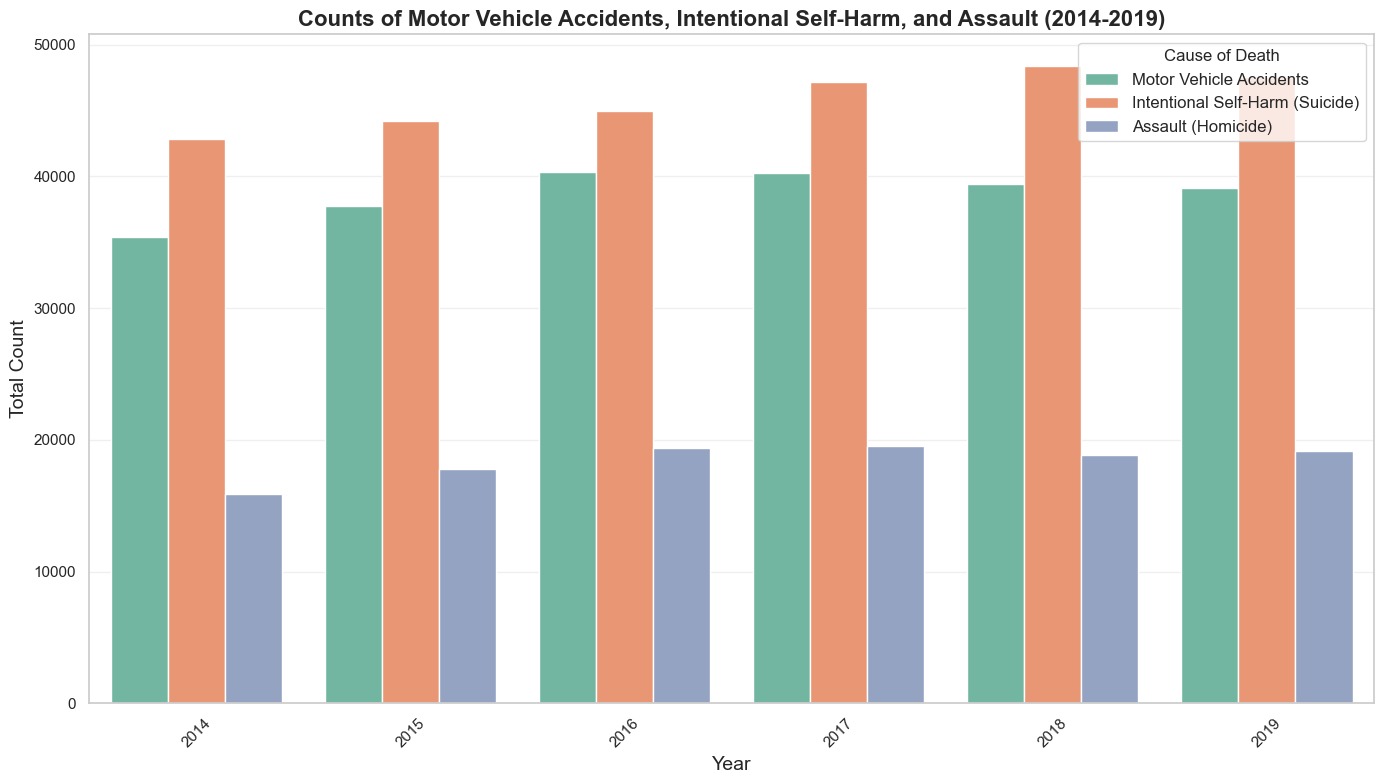

In [16]:
# Load your dataset
data = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')

# Step 1: Aggregate data by year for the selected causes
selected_causes = ['Motor Vehicle Accidents', 'Intentional Self-Harm (Suicide)', 'Assault (Homicide)']

# Sum the counts of each cause by year
cause_counts = data.groupby(['Year'])[selected_causes].sum().reset_index()

# Step 2: Melt the DataFrame to long format for Seaborn
cause_counts_melted = cause_counts.melt(id_vars='Year', var_name='Cause', value_name='Total Count')

# Step 3: Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.set_theme(style='whitegrid')
sns.barplot(data=cause_counts_melted, x='Year', y='Total Count', hue='Cause', palette='Set2')
plt.title('Counts of Motor Vehicle Accidents, Intentional Self-Harm, and Assault (2014-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.legend(title='Cause of Death', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


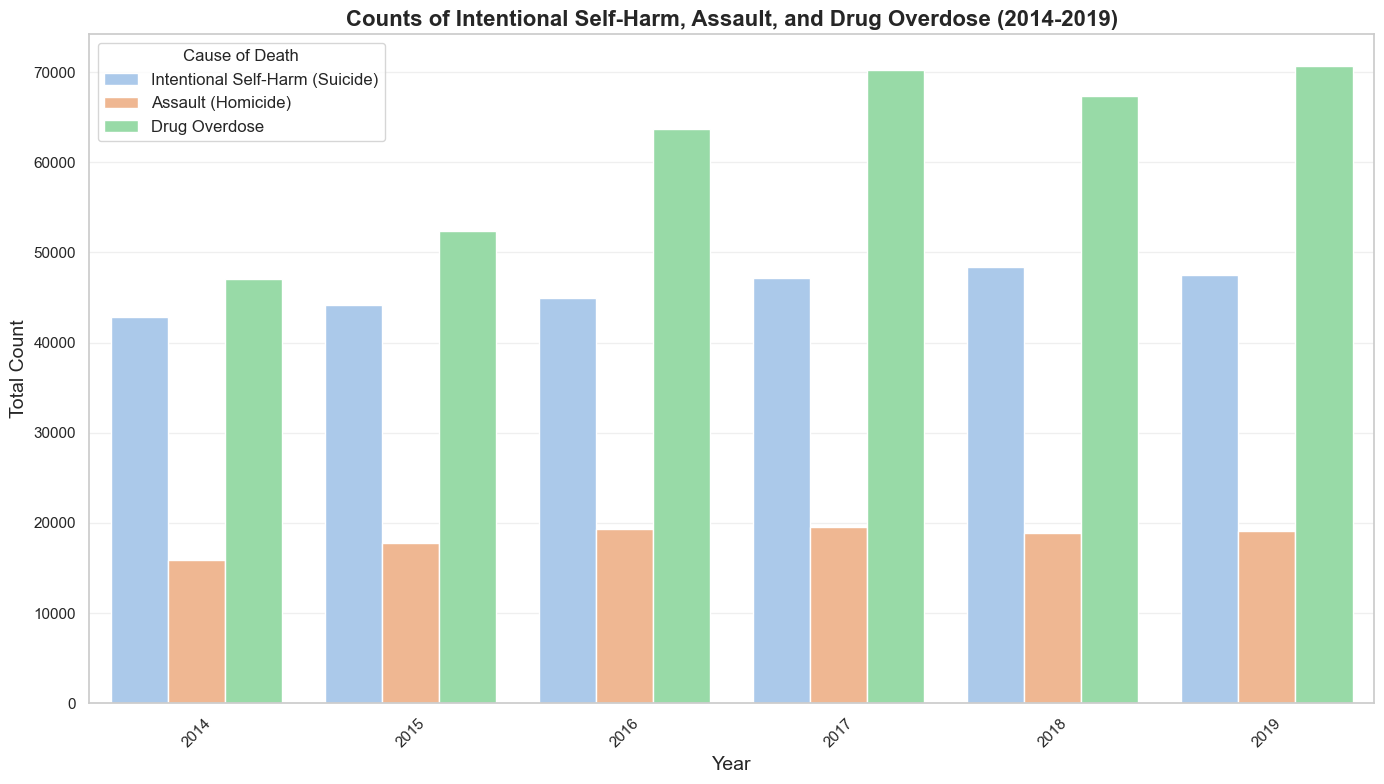

In [19]:
# Load your dataset
data = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')

# Step 1: Aggregate data by year for the selected causes
selected_causes = ['Intentional Self-Harm (Suicide)', 'Assault (Homicide)', 'Drug Overdose']

# Ensure there is a 'Year' column; if not, extract from the date column as needed
if 'Year' not in data.columns:
    # If you have separate 'Month' and 'Year' columns, aggregate accordingly
    data['Year'] = pd.to_datetime(data['Month'], format='%B').dt.year  # Adjust if you have a month column

# Sum the counts of each cause by year
cause_counts = data.groupby(['Year'])[selected_causes].sum().reset_index()

# Step 2: Melt the DataFrame to long format for Seaborn
cause_counts_melted = cause_counts.melt(id_vars='Year', var_name='Cause', value_name='Total Count')

# Step 3: Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.set_theme(style='whitegrid')
sns.barplot(data=cause_counts_melted, x='Year', y='Total Count', hue='Cause', palette='pastel')
plt.title('Counts of Intentional Self-Harm, Assault, and Drug Overdose (2014-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.legend(title='Cause of Death', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


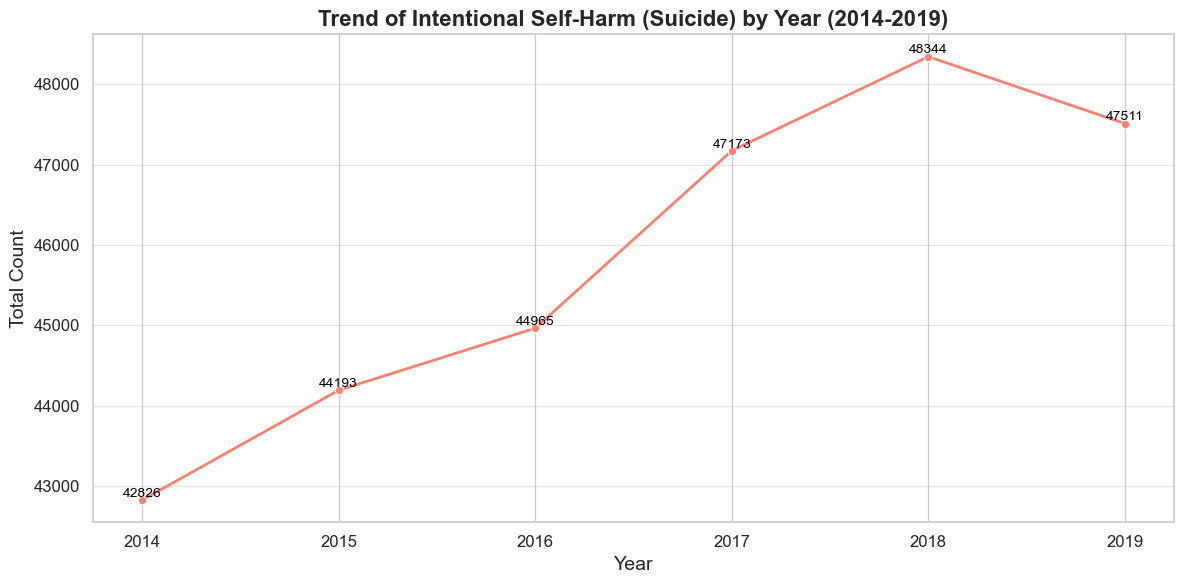

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')
# Ensure there is a 'Year' column
if 'Year' not in data.columns:
    data['Year'] = pd.to_datetime(data['Month'], format='%B').dt.year  # Adjust if you have a month column


suicide_trend = data.groupby(['Year'])['Intentional Self-Harm (Suicide)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_theme(style='whitegrid')
line_plot = sns.lineplot(data=suicide_trend, x='Year', y='Intentional Self-Harm (Suicide)', marker='o', color='salmon', linewidth=2)

plt.title('Trend of Intentional Self-Harm (Suicide) by Year (2014-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(suicide_trend['Year'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
for index, row in suicide_trend.iterrows():
    plt.text(row['Year'], row['Intentional Self-Harm (Suicide)'] + 2, f"{row['Intentional Self-Harm (Suicide)']}", 
             color='black', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


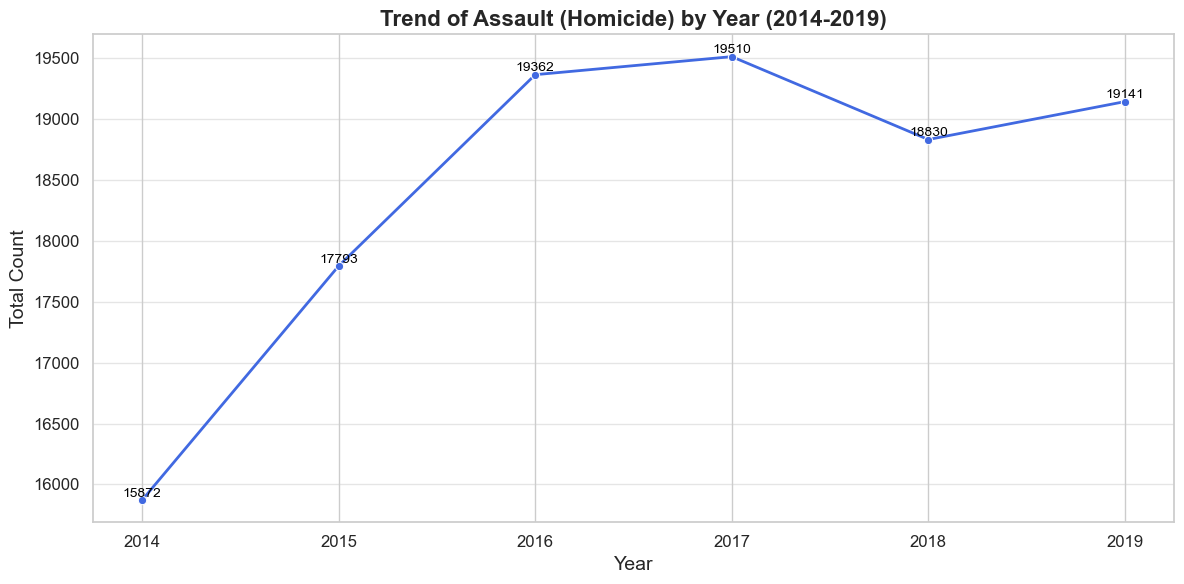

In [21]:
# Load your dataset
data = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')

# Step 1: Aggregate data by year for Assault (Homicide)
# Ensure there is a 'Year' column
if 'Year' not in data.columns:
    data['Year'] = pd.to_datetime(data['Month'], format='%B').dt.year  # Adjust if you have a month column

homicide_trend = data.groupby(['Year'])['Assault (Homicide)'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.set_theme(style='whitegrid')
line_plot = sns.lineplot(data=homicide_trend, x='Year', y='Assault (Homicide)', marker='o', color='royalblue', linewidth=2)

plt.title('Trend of Assault (Homicide) by Year (2014-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(homicide_trend['Year'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
for index, row in homicide_trend.iterrows():
    plt.text(row['Year'], row['Assault (Homicide)'] + 2, f"{row['Assault (Homicide)']}", 
             color='black', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


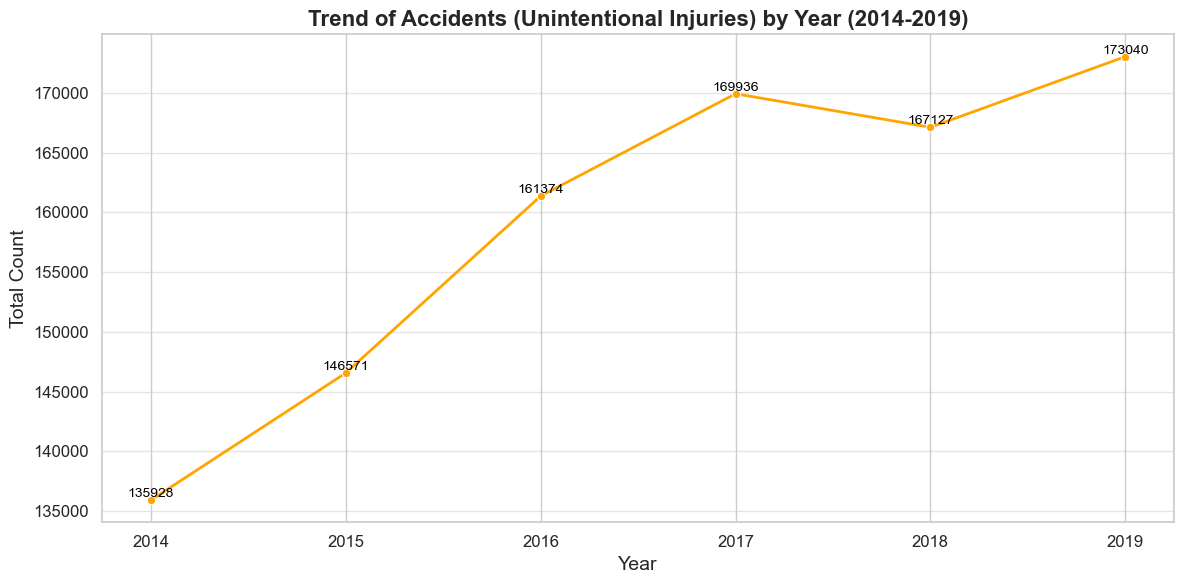

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')

if 'Year' not in data.columns:
    data['Year'] = pd.to_datetime(data['Month'], format='%B').dt.year  # Adjust if you have a month column

accidents_trend = data.groupby(['Year'])['Accidents (Unintentional Injuries)'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.set_theme(style='whitegrid')
line_plot = sns.lineplot(data=accidents_trend, x='Year', y='Accidents (Unintentional Injuries)', marker='o', color='orange', linewidth=2)

plt.title('Trend of Accidents (Unintentional Injuries) by Year (2014-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(accidents_trend['Year'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
for index, row in accidents_trend.iterrows():
    plt.text(row['Year'], row['Accidents (Unintentional Injuries)'] + 2, f"{row['Accidents (Unintentional Injuries)']}", 
             color='black', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_8324\165790220.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Diseases of Heart', data=mc, hue='Jurisdiction of Occurrence', ci=None)


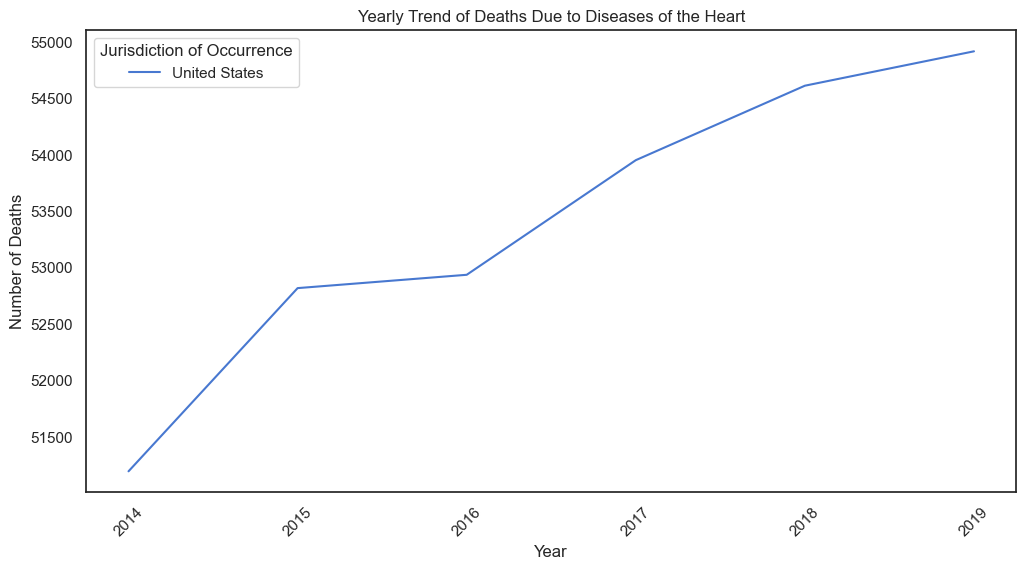

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Diseases of Heart', data=mc, hue='Jurisdiction of Occurrence', ci=None)
plt.title('Yearly Trend of Deaths Due to Diseases of the Heart')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()


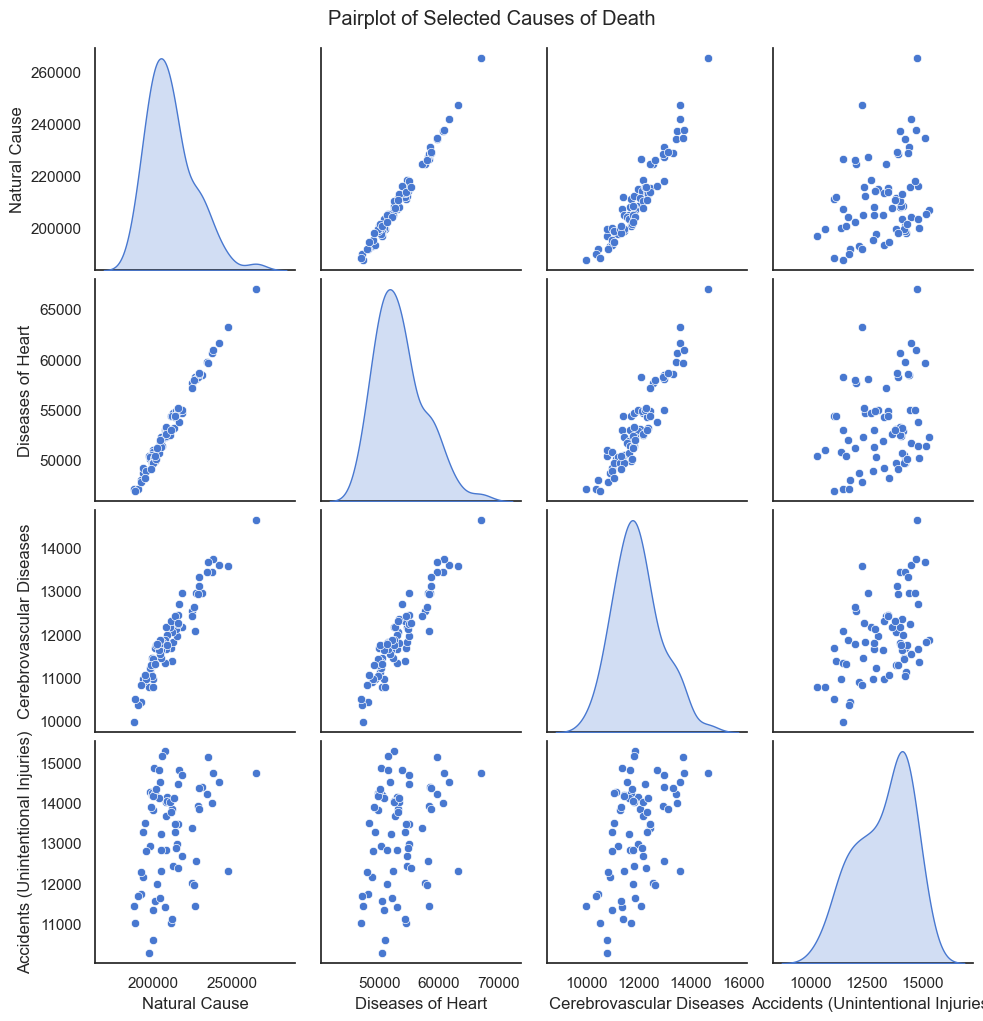

In [11]:
sns.pairplot(mc[['Natural Cause', 'Diseases of Heart', 'Cerebrovascular Diseases', 'Accidents (Unintentional Injuries)']], diag_kind='kde')
plt.suptitle('Pairplot of Selected Causes of Death', y=1.02)
plt.show()


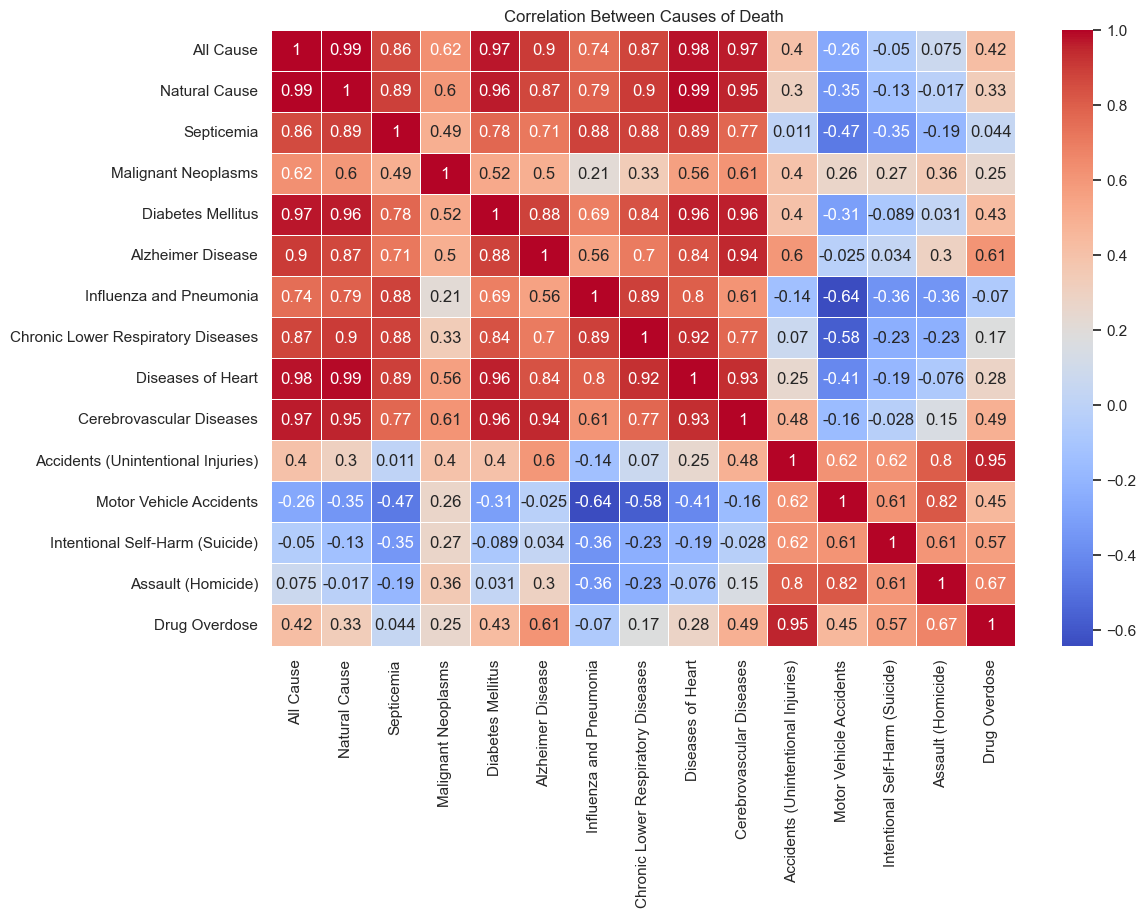

In [10]:
plt.figure(figsize=(12, 8))
correlation = mc[['All Cause', 'Natural Cause', 'Septicemia', 'Malignant Neoplasms', 'Diabetes Mellitus', 
                 'Alzheimer Disease', 'Influenza and Pneumonia', 'Chronic Lower Respiratory Diseases', 
                 'Diseases of Heart', 'Cerebrovascular Diseases', 'Accidents (Unintentional Injuries)', 
                 'Motor Vehicle Accidents', 'Intentional Self-Harm (Suicide)', 'Assault (Homicide)', 
                 'Drug Overdose']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Causes of Death')
plt.show()
